In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from pywaffle import Waffle
import numpy as np
import math
import itertools

In [2]:
prec = 0.87
recall = 0.37

In [3]:
# (prec - 1) * tp + prec * fp = 0
#(recall - 1) * tp + recall * fn = 0 
# tp + fp + fn + tn = 1

In [172]:
y_true = [0, 0, 1, 1, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1, 0, 0]
cm = confusion_matrix(y_true, y_pred)

In [173]:
cm

array([[4, 1],
       [2, 2]])

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


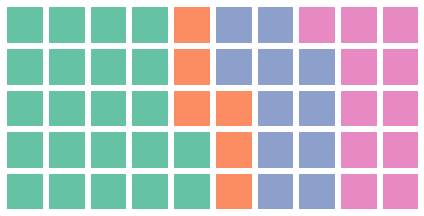

In [6]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,  # Either rows or columns could be omitted
    values=cm.ravel()
)
fig.show()

In [7]:
tn, fp, fn, tp = cm.ravel()

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


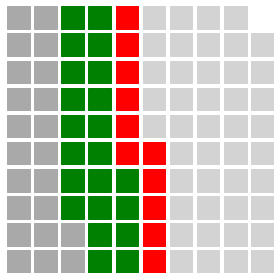

In [8]:
reordered = [fn, tp, fp, tn]
colors=["darkgrey", "green", "red", "lightgrey"]
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=10,  # Either rows or columns could be omitted
    values=reordered,
    colors=["darkgrey", "green", "red", "lightgrey"]
)
fig.show()

<class 'pywaffle.waffle.Waffle'>


/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


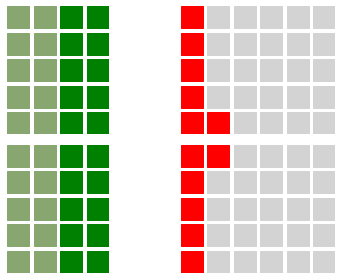

In [9]:
reordered = [fn, tp, fp, tn]
colors=["#88a770", "green", "red", "lightgrey"]

rows = 10
cols = 10
col_ratio = (fn+tp)/sum(reordered)
col_part = int(round(cols * col_ratio))

fig = plt.figure(
    FigureClass=Waffle,
    rows=rows // 2,
      # Either rows or columns could be omitted
    plots = {
        "221": {
            'values':[n/2 for n in reordered[:2] ],
            'starting_location': "NW",
            "colors": colors[:2],
            "columns": col_part,
        },
        "223": {
            'values':[n/2 for n in reordered[:2] ],
            'starting_location': "SW",
            "colors": colors[:2],
            "columns": col_part,
        },
        
        "222": {
            'values':[n/2 for n in reordered[2:] ],
            'starting_location': "SW",
            "colors": colors[2:],
            "columns": cols - col_part,
        },
        "224": {
            'values':[n/2 for n in reordered[2:] ],
            'starting_location': "NW",
            "colors": colors[2:],
            "columns": cols - col_part,
        },
        
    },
    #values=[fn/2, tp/2],
    
    vertical=False,
)

print(fig.__class__)

fig.show()

(14, 14)
h = 11
tp_boxes = 121
 1, 13 1
 2, 13 2
 3, 13 3
 4, 13 4
 5, 13 5
 6, 13 6
 7, 13 7
 8, 13 8
 9, 13 9
 10, 13 10
 11, 13 11
 1, 13 12
 2, 13 13
 3, 13 14
 4, 13 15
 5, 13 16
 6, 13 17
 7, 13 18
 8, 13 19
 9, 13 20
 10, 13 21
 11, 13 22
 1, 12 23
 2, 12 24
 3, 12 25
 4, 12 26
 5, 12 27
 6, 12 28
 7, 12 29
 8, 12 30
 9, 12 31
 10, 12 32
 11, 12 33
 1, 11 34
 2, 11 35
 3, 11 36
 4, 11 37
 5, 11 38
 6, 11 39
 7, 11 40
 8, 11 41
 9, 11 42
 10, 11 43
 11, 11 44
 1, 10 45
 2, 10 46
 3, 10 47
 4, 10 48
 5, 10 49
 6, 10 50
 7, 10 51
 8, 10 52
 9, 10 53
 10, 10 54
 11, 10 55
 1, 9 56
 2, 9 57
 3, 9 58
 4, 9 59
 5, 9 60
 6, 9 61
 7, 9 62
 8, 9 63
 9, 9 64
 10, 9 65
 11, 9 66
 1, 8 67
 2, 8 68
 3, 8 69
 4, 8 70
 5, 8 71
 6, 8 72
 7, 8 73
 8, 8 74
 9, 8 75
 10, 8 76
 11, 8 77
 1, 7 78
 2, 7 79
 3, 7 80
 4, 7 81
 5, 7 82
 6, 7 83
 7, 7 84
 8, 7 85
 9, 7 86
 10, 7 87
 11, 7 88
 1, 6 89
 2, 6 90
 3, 6 91
 4, 6 92
 5, 6 93
 6, 6 94
 7, 6 95
 8, 6 96
 9, 6 97
 10, 6 98
 11, 6 99
 1, 5 100
 2, 

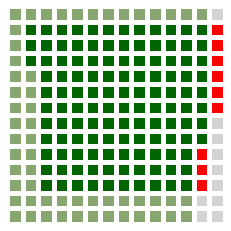

In [218]:

def build_waffle_matrix(size, confusion_matrix):
    rows, cols = size
    print(f"{size}")
    hmap = np.ones( (rows, cols) )
    tn, fp, fn, tp = cm.ravel()
    col_ratio = (fn+tp)/sum(cm.ravel())
    col_part = cols * col_ratio
    fn_tp_boxes = (fn+tp) * cols * rows // sum(cm.ravel())    

    for n in range(fn_tp_boxes, rows * cols):
        ix = n % rows
        iy = n // rows
        hmap[ix, iy] = 4
    normalize =  rows * cols / sum(cm.ravel())
    h = int(min(
        max( math.ceil(tp/col_part * normalize), 
            math.ceil(fp / (cols - col_part) * normalize ))+1,
        rows))
    print(f"h = {h}")
    
    centerx = int(round(rows / 2))
    centery = int(round(col_part))

    midh = int(math.ceil(h/2))
    tp_boxes = int(math.floor(tp * cols * rows / sum(cm.ravel())))
    fp_boxes = int(math.floor(fp * cols * rows / sum(cm.ravel())))

    def boxes_generator(direction=-1, expected_value=1):
        n = 0
        while (True):
            ix = min(centerx - midh + (n % (h)), rows - 1)
            iy = min(centery + direction * (n// (h) -1), cols - 1)
            n += 1
            print(f" {ix}, {iy} {n}")            
            if hmap[ix, iy] == expected_value:
                yield ix, iy
                
    tp_boxes_gen = boxes_generator(direction=-1, expected_value=1)
    print(f"tp_boxes = {tp_boxes}")
    toUpdate = itertools.islice(tp_boxes_gen, tp_boxes)        
    for xy in toUpdate:
        ix, iy = xy
        assert(hmap[ix, iy] == 1)
        hmap[ix, iy] = 2
        
    fp_boxes_gen = boxes_generator(direction=1, expected_value=4)
    print(f"fp_boxes = {fp_boxes}")
    toUpdate = itertools.islice(fp_boxes_gen, fp_boxes)
    for xy in toUpdate:
        ix, iy = xy        
        assert(hmap[ix, iy] == 4)
        hmap[ix, iy] = 3
        
    return hmap

def plot_waffle_matrix(hmap, 
                       cmap = (mpl.colors.ListedColormap(["#88a770", "darkgreen", "red", "lightgrey"])), 
                       linewidth=5
                      ):
    fig, ax = plt.subplots()

    im = ax.imshow(hmap, cmap=cmap)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    unitmove = 1.0
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticks(np.arange(hmap.shape[1]+unitmove)-unitmove/2, minor=True)
    ax.set_yticks(np.arange(hmap.shape[0]+unitmove)-unitmove/2, minor=True)
    
    ax.grid(which="minor", color="w", linestyle='-', linewidth=linewidth)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

hmap = build_waffle_matrix( (14, 14), cm)
plot_waffle_matrix(hmap)

(14, 14)
[[ 1 11]
 [ 9  6]]
(14, 14)
h = 14
tp_boxes = 43
 0, 9 1
 1, 9 2
 2, 9 3
 3, 9 4
 4, 9 5
 5, 9 6
 6, 9 7
 7, 9 8
 8, 9 9
 9, 9 10
 10, 9 11
 11, 9 12
 12, 9 13
 13, 9 14
 0, 8 15
 1, 8 16
 2, 8 17
 3, 8 18
 4, 8 19
 5, 8 20
 6, 8 21
 7, 8 22
 8, 8 23
 9, 8 24
 10, 8 25
 11, 8 26
 12, 8 27
 13, 8 28
 0, 7 29
 1, 7 30
 2, 7 31
 3, 7 32
 4, 7 33
 5, 7 34
 6, 7 35
 7, 7 36
 8, 7 37
 9, 7 38
 10, 7 39
 11, 7 40
 12, 7 41
 13, 7 42
 0, 6 43
 1, 6 44
 2, 6 45
 3, 6 46
 4, 6 47
 5, 6 48
 6, 6 49
 7, 6 50
 8, 6 51
 9, 6 52
 10, 6 53
 11, 6 54
 12, 6 55
 13, 6 56
 0, 5 57
 1, 5 58
 2, 5 59
 3, 5 60
 4, 5 61
 5, 5 62
 6, 5 63
 7, 5 64
 8, 5 65
 9, 5 66
 10, 5 67
 11, 5 68
 12, 5 69
 13, 5 70
 0, 4 71
 1, 4 72
 2, 4 73
 3, 4 74
 4, 4 75
fp_boxes = 79
 0, 7 1
 1, 7 2
 2, 7 3
 3, 7 4
 4, 7 5
 5, 7 6
 6, 7 7
 7, 7 8
 8, 7 9
 9, 7 10
 10, 7 11
 11, 7 12
 12, 7 13
 13, 7 14
 0, 8 15
 1, 8 16
 2, 8 17
 3, 8 18
 4, 8 19
 5, 8 20
 6, 8 21
 7, 8 22
 8, 8 23
 9, 8 24
 10, 8 25
 11, 8 26
 12, 8 27
 

[21.18918919 47.67567568 63.56756757 63.56756757]
[21, 47, 63, 65]
counts sum = 196 - cols x rows = 196 
(14, 14)
[[ 2 11]
 [10  5]]
(14, 14)
h = 13
tp_boxes = 35
 0, 9 1
 1, 9 2
 2, 9 3
 3, 9 4
 4, 9 5
 5, 9 6
 6, 9 7
 7, 9 8
 8, 9 9
 9, 9 10
 10, 9 11
 11, 9 12
 12, 9 13
 0, 8 14
 1, 8 15
 2, 8 16
 3, 8 17
 4, 8 18
 5, 8 19
 6, 8 20
 7, 8 21
 8, 8 22
 9, 8 23
 10, 8 24
 11, 8 25
 12, 8 26
 0, 7 27
 1, 7 28
 2, 7 29
 3, 7 30
 4, 7 31
 5, 7 32
 6, 7 33
 7, 7 34
 8, 7 35
 9, 7 36
 10, 7 37
 11, 7 38
 12, 7 39
 0, 6 40
 1, 6 41
 2, 6 42
 3, 6 43
 4, 6 44
 5, 6 45
 6, 6 46
 7, 6 47
 8, 6 48
 9, 6 49
 10, 6 50
 11, 6 51
 12, 6 52
 0, 5 53
 1, 5 54
 2, 5 55
 3, 5 56
 4, 5 57
 5, 5 58
 6, 5 59
 7, 5 60
 8, 5 61
 9, 5 62
 10, 5 63
 11, 5 64
 12, 5 65
 0, 4 66
 1, 4 67
fp_boxes = 77
 0, 7 1
 1, 7 2
 2, 7 3
 3, 7 4
 4, 7 5
 5, 7 6
 6, 7 7
 7, 7 8
 8, 7 9
 9, 7 10
 10, 7 11
 11, 7 12
 12, 7 13
 0, 8 14
 1, 8 15
 2, 8 16
 3, 8 17
 4, 8 18
 5, 8 19
 6, 8 20
 7, 8 21
 8, 8 22
 9, 8 23
 10, 8 24
 11

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


[11.52941176 69.17647059 34.58823529 80.70588235]
[11, 69, 34, 82]
counts sum = 196 - cols x rows = 196 
(14, 14)
[[ 9 10]
 [ 1  4]]
(14, 14)
h = 13
tp_boxes = 32
 0, 4 1
 1, 4 2
 2, 4 3
 3, 4 4
 4, 4 5
 5, 4 6
 6, 4 7
 7, 4 8
 8, 4 9
 9, 4 10
 10, 4 11
 11, 4 12
 12, 4 13
 0, 3 14
 1, 3 15
 2, 3 16
 3, 3 17
 4, 3 18
 5, 3 19
 6, 3 20
 7, 3 21
 8, 3 22
 9, 3 23
 10, 3 24
 11, 3 25
 12, 3 26
 0, 2 27
 1, 2 28
 2, 2 29
 3, 2 30
 4, 2 31
 5, 2 32
 6, 2 33
 7, 2 34
 8, 2 35
 9, 2 36
 10, 2 37
 11, 2 38
 12, 2 39
 0, 1 40
 1, 1 41
 2, 1 42
 3, 1 43
 4, 1 44
 5, 1 45
 6, 1 46
 7, 1 47
 8, 1 48
 9, 1 49
 10, 1 50
 11, 1 51
 12, 1 52
 0, 0 53
 1, 0 54
 2, 0 55
 3, 0 56
 4, 0 57
 5, 0 58
 6, 0 59
fp_boxes = 81
 0, 2 1
 1, 2 2
 2, 2 3
 3, 2 4
 4, 2 5
 5, 2 6
 6, 2 7
 7, 2 8
 8, 2 9
 9, 2 10
 10, 2 11
 11, 2 12
 12, 2 13
 0, 3 14
 1, 3 15
 2, 3 16
 3, 3 17
 4, 3 18
 5, 3 19
 6, 3 20
 7, 3 21
 8, 3 22
 9, 3 23
 10, 3 24
 11, 3 25
 12, 3 26
 0, 4 27
 1, 4 28
 2, 4 29
 3, 4 30
 4, 4 31
 5, 4 32
 6, 

[24.5   67.375 61.25  42.875]
[24, 67, 61, 44]
counts sum = 196 - cols x rows = 196 
(14, 14)
[[8 6]
 [7 8]]
(14, 14)
h = 9
tp_boxes = 54
 2, 8 1
 3, 8 2
 4, 8 3
 5, 8 4
 6, 8 5
 7, 8 6
 8, 8 7
 9, 8 8
 10, 8 9
 2, 7 10
 3, 7 11
 4, 7 12
 5, 7 13
 6, 7 14
 7, 7 15
 8, 7 16
 9, 7 17
 10, 7 18
 2, 6 19
 3, 6 20
 4, 6 21
 5, 6 22
 6, 6 23
 7, 6 24
 8, 6 25
 9, 6 26
 10, 6 27
 2, 5 28
 3, 5 29
 4, 5 30
 5, 5 31
 6, 5 32
 7, 5 33
 8, 5 34
 9, 5 35
 10, 5 36
 2, 4 37
 3, 4 38
 4, 4 39
 5, 4 40
 6, 4 41
 7, 4 42
 8, 4 43
 9, 4 44
 10, 4 45
 2, 3 46
 3, 3 47
 4, 3 48
 5, 3 49
 6, 3 50
 7, 3 51
 8, 3 52
 9, 3 53
 10, 3 54
 2, 2 55
 3, 2 56
 4, 2 57
 5, 2 58
 6, 2 59
 7, 2 60
 8, 2 61
 9, 2 62
 10, 2 63
 2, 1 64
 3, 1 65
 4, 1 66
 5, 1 67
 6, 1 68
 7, 1 69
 8, 1 70
 9, 1 71
fp_boxes = 40
 2, 6 1
 3, 6 2
 4, 6 3
 5, 6 4
 6, 6 5
 7, 6 6
 8, 6 7
 9, 6 8
 10, 6 9
 2, 7 10
 3, 7 11
 4, 7 12
 5, 7 13
 6, 7 14
 7, 7 15
 8, 7 16
 9, 7 17
 10, 7 18
 2, 8 19
 3, 8 20
 4, 8 21
 5, 8 22
 6, 8 23
 7, 8 24
 8

 3, 6 2
 4, 6 3
 5, 6 4
 6, 6 5
 7, 6 6
 8, 6 7
 9, 6 8
 10, 6 9
 11, 6 10
 2, 7 11
 3, 7 12
 4, 7 13
 5, 7 14
 6, 7 15
 7, 7 16
 8, 7 17
 9, 7 18
 10, 7 19
 11, 7 20
 2, 8 21
 3, 8 22
 4, 8 23
 5, 8 24
 6, 8 25
 7, 8 26
 8, 8 27
 9, 8 28
 10, 8 29
[36.75  55.125 24.5   79.625]
[36, 55, 24, 81]
counts sum = 196 - cols x rows = 196 
(14, 14)
[[ 1  8]
 [ 7 11]]
(14, 14)
h = 14
tp_boxes = 79
 0, 10 1
 1, 10 2
 2, 10 3
 3, 10 4
 4, 10 5
 5, 10 6
 6, 10 7
 7, 10 8
 8, 10 9
 9, 10 10
 10, 10 11
 11, 10 12
 12, 10 13
 13, 10 14
 0, 9 15
 1, 9 16
 2, 9 17
 3, 9 18
 4, 9 19
 5, 9 20
 6, 9 21
 7, 9 22
 8, 9 23
 9, 9 24
 10, 9 25
 11, 9 26
 12, 9 27
 13, 9 28
 0, 8 29
 1, 8 30
 2, 8 31
 3, 8 32
 4, 8 33
 5, 8 34
 6, 8 35
 7, 8 36
 8, 8 37
 9, 8 38
 10, 8 39
 11, 8 40
 12, 8 41
 13, 8 42
 0, 7 43
 1, 7 44
 2, 7 45
 3, 7 46
 4, 7 47
 5, 7 48
 6, 7 49
 7, 7 50
 8, 7 51
 9, 7 52
 10, 7 53
 11, 7 54
 12, 7 55
 13, 7 56
 0, 6 57
 1, 6 58
 2, 6 59
 3, 6 60
 4, 6 61
 5, 6 62
 6, 6 63
 7, 6 64
 8, 6 65
 9

[94.62068966  6.75862069 33.79310345 60.82758621]
[95, 6, 33, 62]
counts sum = 196 - cols x rows = 196 
(14, 14)
[[ 5  1]
 [ 5 14]]
(14, 14)
h = 12
tp_boxes = 109
 1, 12 1
 2, 12 2
 3, 12 3
 4, 12 4
 5, 12 5
 6, 12 6
 7, 12 7
 8, 12 8
 9, 12 9
 10, 12 10
 11, 12 11
 12, 12 12
 1, 11 13
 2, 11 14
 3, 11 15
 4, 11 16
 5, 11 17
 6, 11 18
 7, 11 19
 8, 11 20
 9, 11 21
 10, 11 22
 11, 11 23
 12, 11 24
 1, 10 25
 2, 10 26
 3, 10 27
 4, 10 28
 5, 10 29
 6, 10 30
 7, 10 31
 8, 10 32
 9, 10 33
 10, 10 34
 11, 10 35
 12, 10 36
 1, 9 37
 2, 9 38
 3, 9 39
 4, 9 40
 5, 9 41
 6, 9 42
 7, 9 43
 8, 9 44
 9, 9 45
 10, 9 46
 11, 9 47
 12, 9 48
 1, 8 49
 2, 8 50
 3, 8 51
 4, 8 52
 5, 8 53
 6, 8 54
 7, 8 55
 8, 8 56
 9, 8 57
 10, 8 58
 11, 8 59
 12, 8 60
 1, 7 61
 2, 7 62
 3, 7 63
 4, 7 64
 5, 7 65
 6, 7 66
 7, 7 67
 8, 7 68
 9, 7 69
 10, 7 70
 11, 7 71
 12, 7 72
 1, 6 73
 2, 6 74
 3, 6 75
 4, 6 76
 5, 6 77
 6, 6 78
 7, 6 79
 8, 6 80
 9, 6 81
 10, 6 82
 11, 6 83
 12, 6 84
 1, 5 85
 2, 5 86
 3, 5 87
 4, 5 

[49. 70. 77.  0.]
[49, 70, 77, 0]
counts sum = 196 - cols x rows = 196 
(14, 14)
[[9 6]
 [4 9]]
(14, 14)
h = 11
tp_boxes = 63
 1, 7 1
 2, 7 2
 3, 7 3
 4, 7 4
 5, 7 5
 6, 7 6
 7, 7 7
 8, 7 8
 9, 7 9
 10, 7 10
 11, 7 11
 1, 6 12
 2, 6 13
 3, 6 14
 4, 6 15
 5, 6 16
 6, 6 17
 7, 6 18
 8, 6 19
 9, 6 20
 10, 6 21
 11, 6 22
 1, 5 23
 2, 5 24
 3, 5 25
 4, 5 26
 5, 5 27
 6, 5 28
 7, 5 29
 8, 5 30
 9, 5 31
 10, 5 32
 11, 5 33
 1, 4 34
 2, 4 35
 3, 4 36
 4, 4 37
 5, 4 38
 6, 4 39
 7, 4 40
 8, 4 41
 9, 4 42
 10, 4 43
 11, 4 44
 1, 3 45
 2, 3 46
 3, 3 47
 4, 3 48
 5, 3 49
 6, 3 50
 7, 3 51
 8, 3 52
 9, 3 53
 10, 3 54
 11, 3 55
 1, 2 56
 2, 2 57
 3, 2 58
 4, 2 59
 5, 2 60
 6, 2 61
 7, 2 62
 8, 2 63
 9, 2 64
 10, 2 65
 11, 2 66
 1, 1 67
 2, 1 68
 3, 1 69
 4, 1 70
 5, 1 71
 6, 1 72
 7, 1 73
 8, 1 74
 9, 1 75
 10, 1 76
 11, 1 77
 1, 0 78
 2, 0 79
fp_boxes = 42
 1, 5 1
 2, 5 2
 3, 5 3
 4, 5 4
 5, 5 5
 6, 5 6
 7, 5 7
 8, 5 8
 9, 5 9
 10, 5 10
 11, 5 11
 1, 6 12
 2, 6 13
 3, 6 14
 4, 6 15
 5, 6 16
 6, 6 1

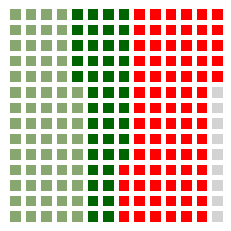

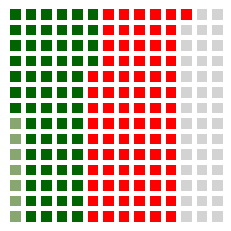

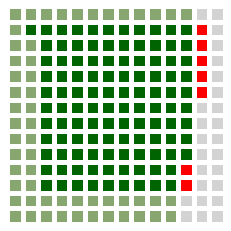

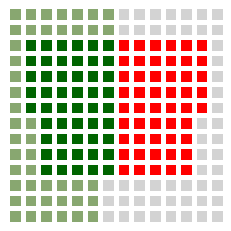

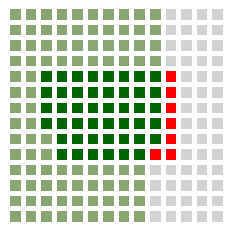

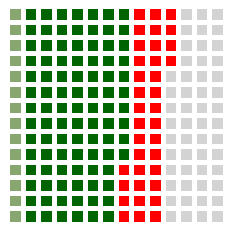

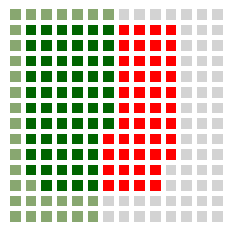

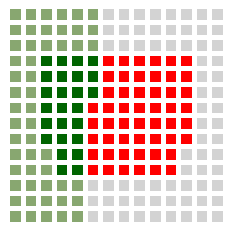

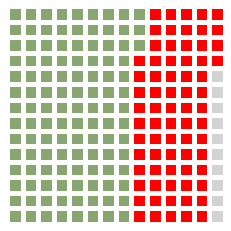

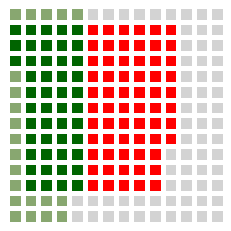

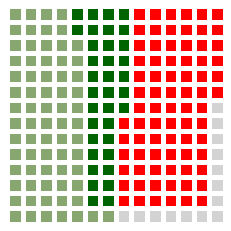

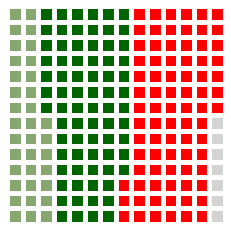

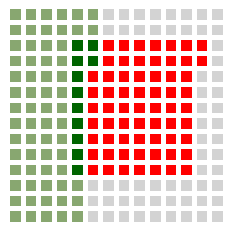

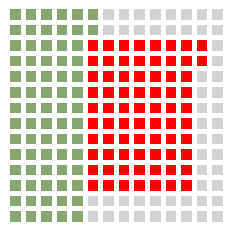

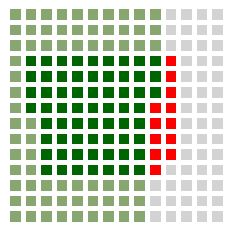

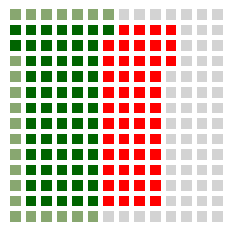

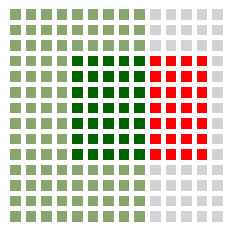

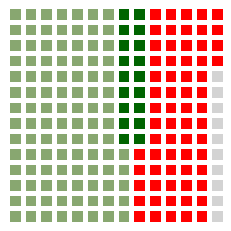

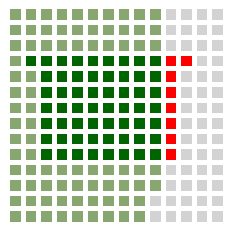

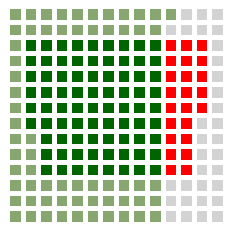

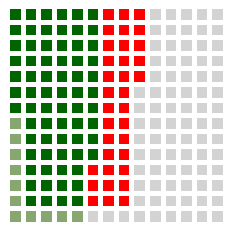

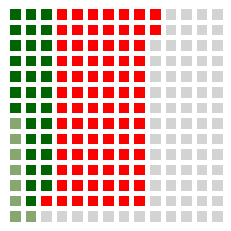

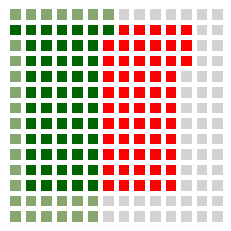

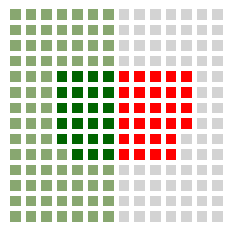

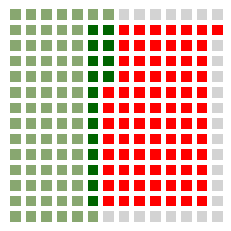

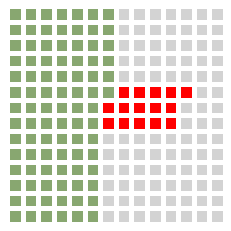

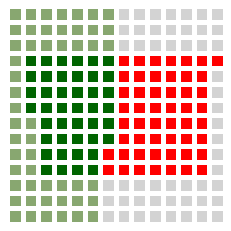

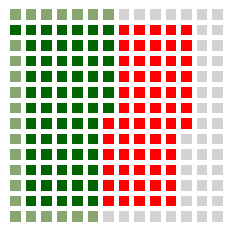

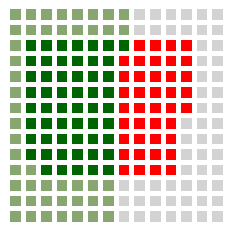

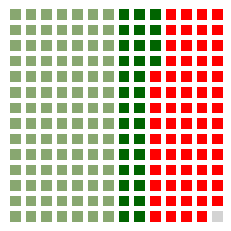

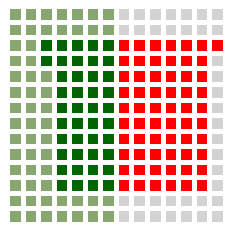

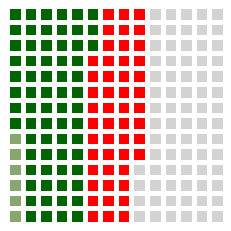

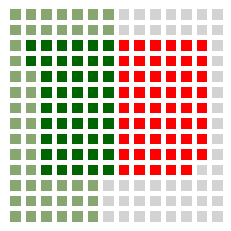

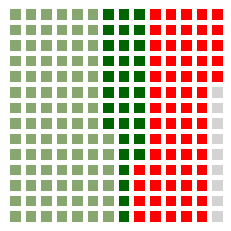

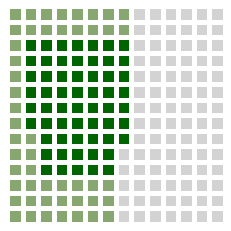

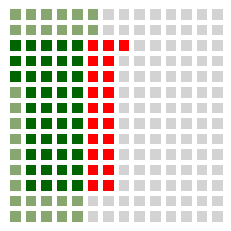

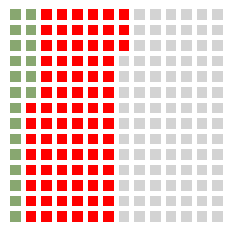

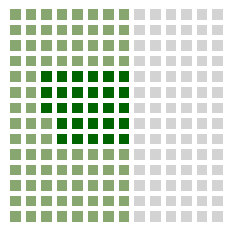

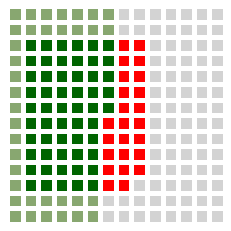

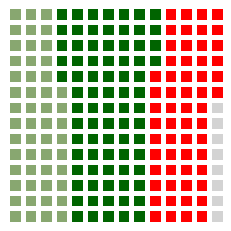

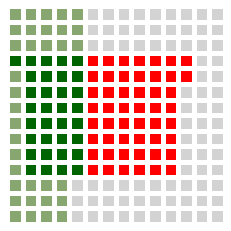

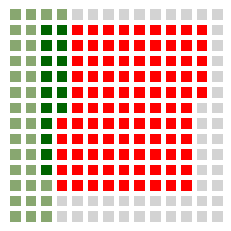

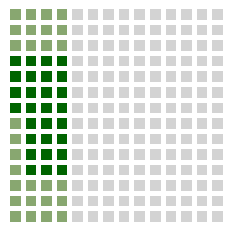

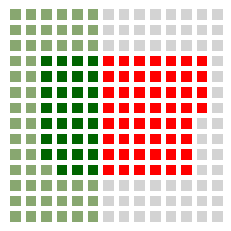

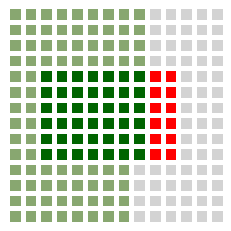

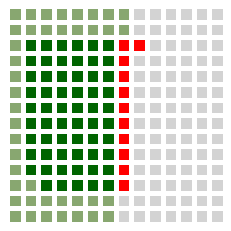

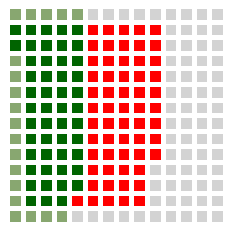

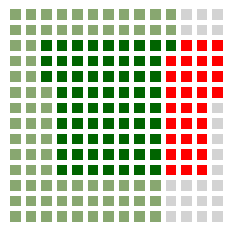

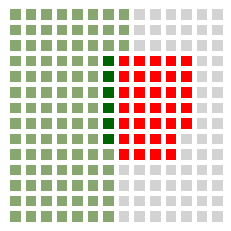

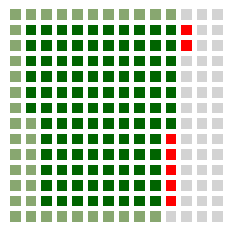

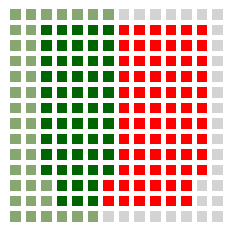

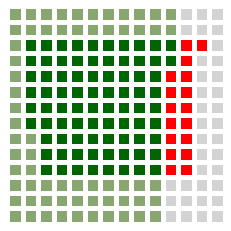

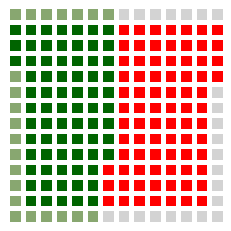

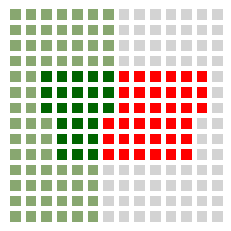

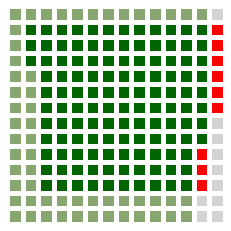

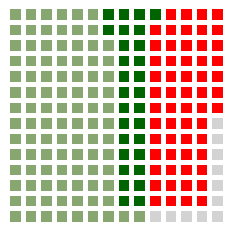

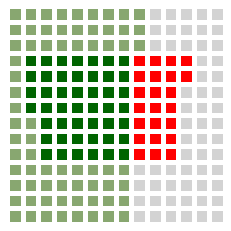

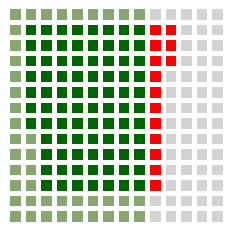

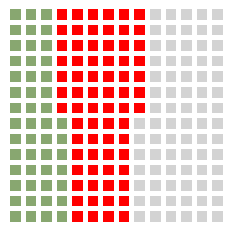

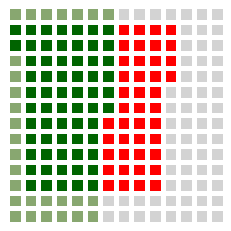

In [219]:
import random
random.seed(3)
rng = np.random.default_rng(seed=42)

def test_build_waffle_matrix(cols, rows, cm):
    hmap = build_waffle_matrix( (rows, cols), cm)
    plot_waffle_matrix(hmap)
    tn, fp, fn, tp = cm.ravel()
    values, counts = np.unique(hmap, return_counts=True)
    result_counts = [0] * 4
    for v, c in zip(values, counts):        
        result_counts[int(v)-1] = c
        
    ordered_vector = [fn, tp, fp, tn]
    normalized_vect =  ordered_vector / sum(ordered_vector) * cols * rows

    print(normalized_vect)
    print(result_counts)
    print(f"counts sum = {sum(result_counts)} - cols x rows = { cols * rows} ")
    max_error = np.max(np.abs(normalized_vect - result_counts))    
    assert max_error < 2.0, f" max_error = {max_error}"

for i in range(60):
    cols = 14 #random.randint(5, 15)
    rows = 14   #random.randint(5, 15)
    print( (rows, cols))
    cm = rng.integers(low=0, high=15, size=(2, 2))
    print(cm)
    
    test_build_waffle_matrix(cols, rows, cm)
    

In [189]:
cm


array([[ 6, 12],
       [ 1, 10]])

In [ ]:
max( tp/col_part, fp / (cols - col_part))

In [ ]:
(tp/col_part, fp / (cols - col_part))

In [ ]:
col_part